In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats.preprocess import print_segments, preprocess

from udisc_stats.visualize import (
    get_year_stats,
    moving_avg,
    get_score_avg,
    get_score_counts,
    get_score_df,
    get_cumulative_score_df,
    get_player_stats,
    get_month_df,
    get_goal,
    plot_month_df,
)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards 7.csv")

orig_df.head(40)

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Par,Bryan Park,Yellow Tees (Shorts),2023-02-27 1731,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-27 1731,58,0.0,3,3,3,4,3,3,3,4,4,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-27 1731,64,6.0,3,3,3,5,3,3,2,4,4,3.0,10.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Par,Bryan Park,Yellow Tees (Shorts),2023-02-24 1611,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-24 1611,59,1.0,3,4,3,3,3,3,3,4,3,3.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-24 1611,78,20.0,4,3,6,4,3,4,3,6,4,5.0,6.0,3.0,3.0,7.0,3.0,4.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Par,Bryan Park,Yellow Tees (Shorts),2023-02-23 1730,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-23 1730,59,1.0,3,3,3,4,3,2,3,4,3,6.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Par,Bryan Park,Yellow Tees (Shorts),2023-02-22 1653,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-22 1653,60,2.0,3,2,3,4,3,3,2,5,4,3.0,7.0,3.0,2.0,3.0,2.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = preprocess(orig_df)

df.head(40)

2020-11-05 17:22:00


,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,58,0.0,3,3,3,4,3,3,3,4,4,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
2,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-27 17:31:00,64,6.0,3,3,3,5,3,3,2,4,4,3.0,10.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
3,Par,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
4,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,59,1.0,3,4,3,3,3,3,3,4,3,3.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
5,Riley,Bryan Park,Yellow Tees (Shorts),2023-02-24 16:11:00,78,20.0,4,3,6,4,3,4,3,6,4,5.0,6.0,3.0,3.0,7.0,3.0,4.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
6,Par,Bryan Park,Yellow Tees (Shorts),2023-02-23 17:30:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
7,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-23 17:30:00,59,1.0,3,3,3,4,3,2,3,4,3,6.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
8,Par,Bryan Park,Yellow Tees (Shorts),2023-02-22 16:53:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
9,Monkey,Bryan Park,Yellow Tees (Shorts),2023-02-22 16:53:00,60,2.0,3,2,3,4,3,3,2,5,4,3.0,7.0,3.0,2.0,3.0,2.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023


In [4]:
score_df = get_score_df(df)

score_df.head(20)

,PlayerName,CourseName,LayoutNameAdj,Date,Year,Hole,Score,Par,Diff,ScoreName
0,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole01,4.0,3.0,1.0,Bogie
1,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole02,4.0,3.0,1.0,Bogie
2,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole03,4.0,3.0,1.0,Bogie
3,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole04,5.0,4.0,1.0,Bogie
4,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole05,4.0,3.0,1.0,Bogie
5,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole06,3.0,3.0,0.0,Par
6,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole07,5.0,3.0,2.0,Double Bogie
7,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole08,5.0,4.0,1.0,Bogie
8,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole09,5.0,3.0,2.0,Double Bogie
9,Monkey,Bryan Park,Paver Tees,2020-10-09 13:33:00,2020,Hole10,4.0,3.0,1.0,Bogie


In [5]:
print_segments(df)

Players: ['Par', 'Monkey', 'Riley', 'Kameron', 'Allison', 'Sam Forsyth', 'Josh', 'Anna', 'Noah', 'Natty', 'Jack', 'Bryan Der', 'Holly', 'Scott', 'James M.', 'Austin', 'Bryce', 'John Farmer', 'Tyler', 'Hitesh', 'Glasser', 'David', 'Patty Ice ']
Courses: ['Bryan Park', 'Dunncroft - Castle Point Park', 'Walnut Creek Park', 'THE Diavolo DGC @ New Hope Park', 'Gillies Creek Park', 'University Of Richmond', 'Dorey Park', 'Elver Park', 'Nine Springs Golf Course', 'Schenley Park', 'Loriella Park', "Bird's Ruins DGC", 'Bluemont Park']
Layouts: ['Yellows Tees', 'Shorts then Longs', 'Short - Long', 'Paver Tees', 'Red - Short Tees', 'Diavolo White', 'Main', 'White - Short Tees', 'Front 9 ', '2022 USWDGC', 'White Tees', 'White Tees to Yellow Baskets', 'Shorts To Shorts', 'Back 9', 'Blue - Long Tees', 'Chainbangers’ 18', 'Short tees Red baskets']


In [6]:
course="Bryan Park"
# course="Dunncroft - Castle Point Park"

layout="Yellows Tees"
# layout="Paver Tees"
# layout = "Shorts then Longs"

# min_date="2020-01"
min_date="2021-01"
# min_date="2022-01"

In [7]:
seg_cols = ["CourseName", "LayoutNameAdj"]
merge_cols = seg_cols + ["Hole"]
max_hole_df = score_df[merge_cols].groupby(seg_cols).max()

ma_df = max_hole_df.merge(score_df, on=merge_cols, how="left")

ma_df

,CourseName,LayoutNameAdj,Hole,PlayerName,Date,Year,Score,Par,Diff,ScoreName
0,Bird's Ruins DGC,Shorts To Shorts,Hole28,James M.,2022-05-04 19:03:00,2022,4.0,3.0,1.0,Bogie
1,Bird's Ruins DGC,Shorts To Shorts,Hole28,Monkey,2022-05-04 19:03:00,2022,3.0,3.0,0.0,Par
2,Bird's Ruins DGC,Shorts To Shorts,Hole28,Scott,2022-05-04 19:03:00,2022,3.0,3.0,0.0,Par
3,Bluemont Park,Chainbangers’ 18,Hole18,Hitesh,2021-09-04 16:13:00,2021,5.0,4.0,1.0,Bogie
4,Bluemont Park,Chainbangers’ 18,Hole18,Monkey,2021-09-04 16:13:00,2021,4.0,4.0,0.0,Par
...,...,...,...,...,...,...,...,...,...,...
551,University Of Richmond,Main,Hole18,Monkey,2022-10-24 17:03:00,2022,4.0,3.0,1.0,Bogie
552,University Of Richmond,Main,Hole18,Natty,2022-10-24 17:03:00,2022,4.0,3.0,1.0,Bogie
553,Walnut Creek Park,Short - Long,Hole18,Kameron,2023-01-28 11:43:00,2023,4.0,4.0,0.0,Par
554,Walnut Creek Park,Short - Long,Hole18,Monkey,2023-01-28 11:43:00,2023,4.0,4.0,0.0,Par


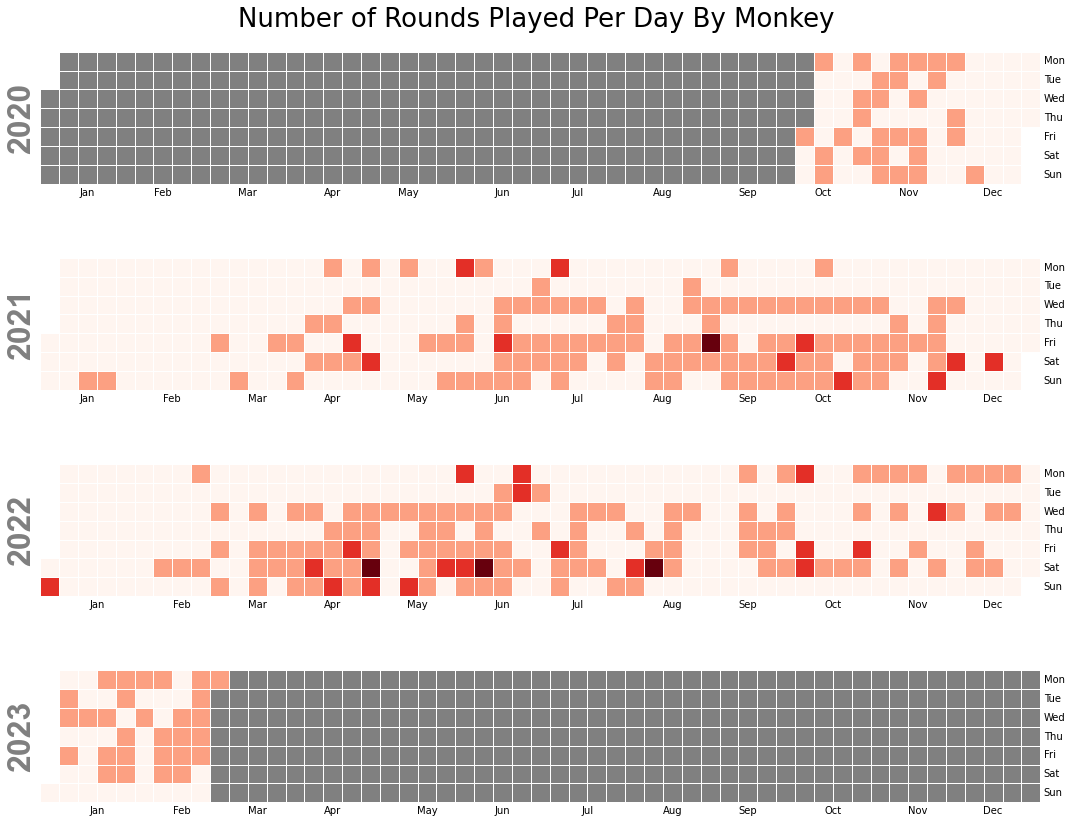

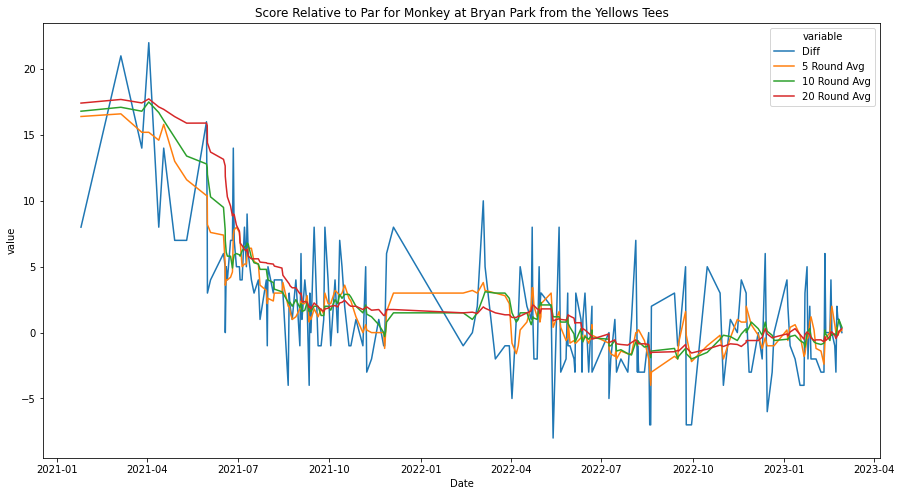

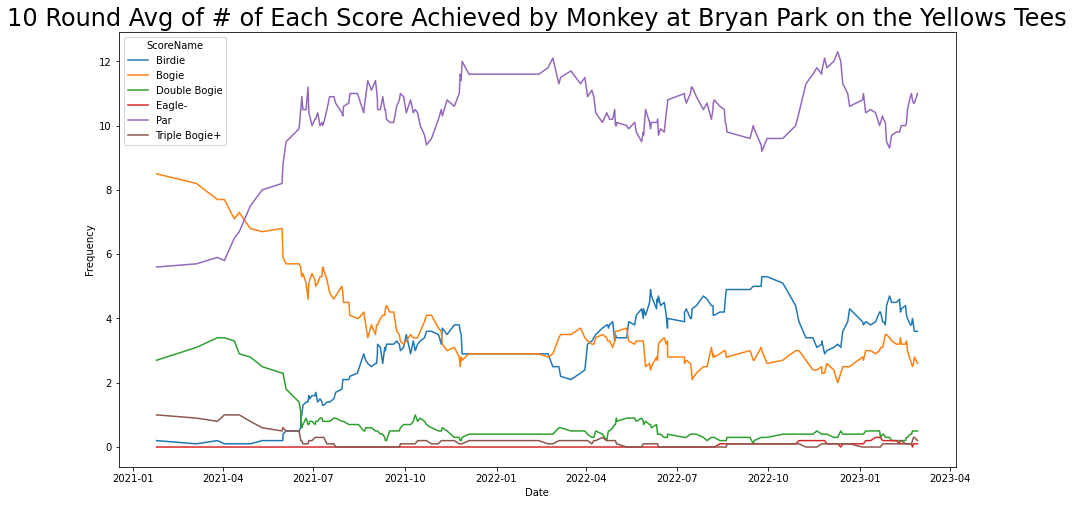

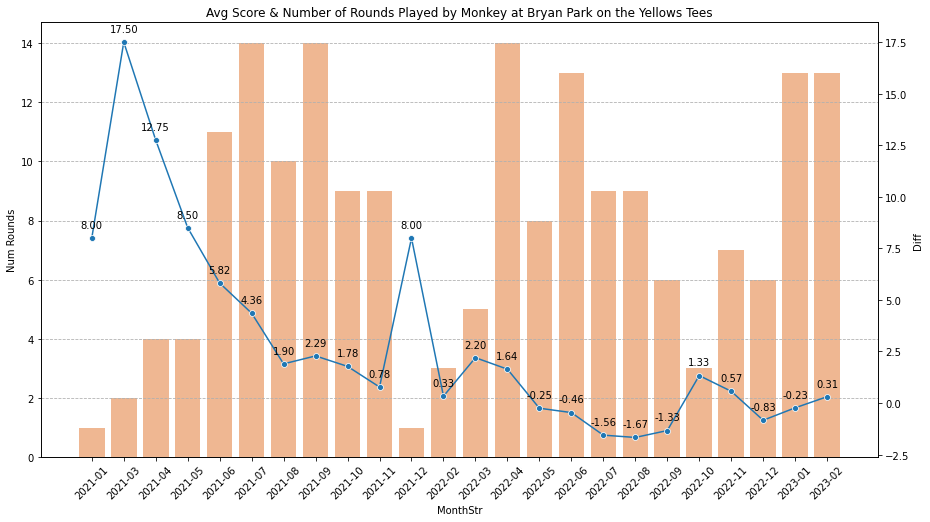

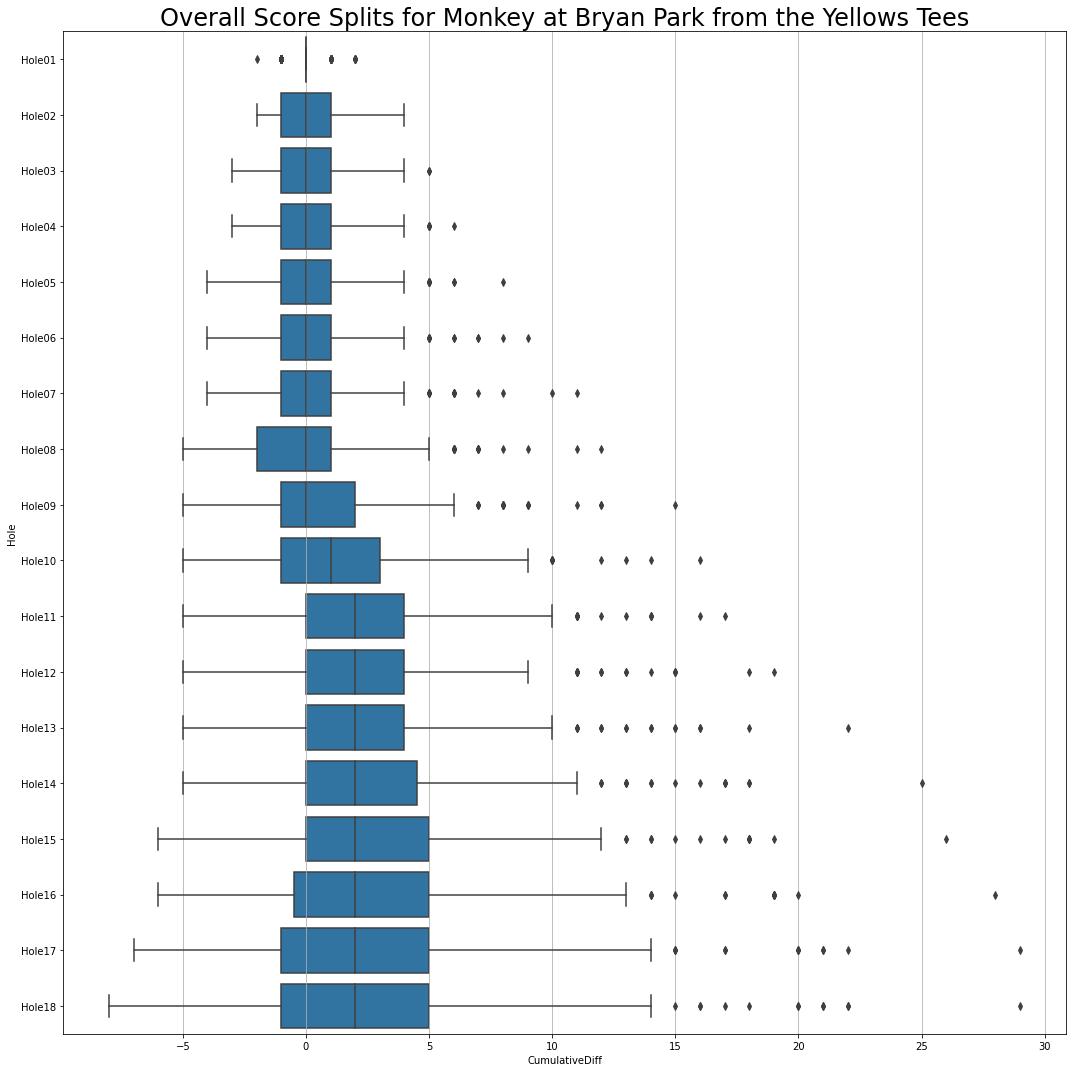

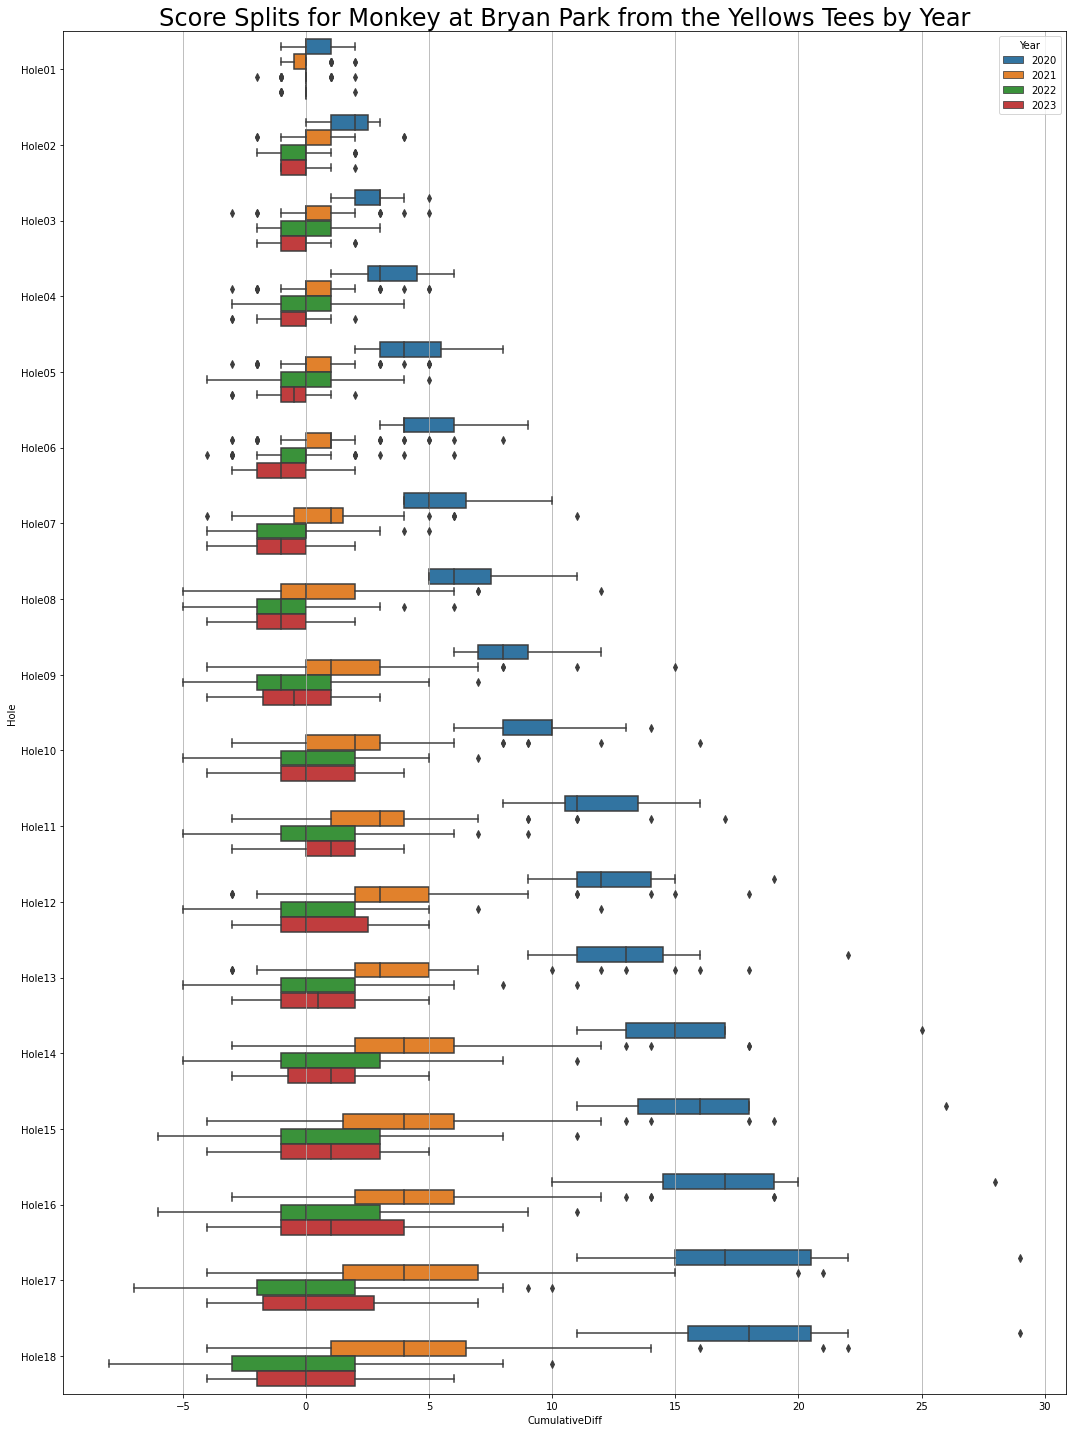

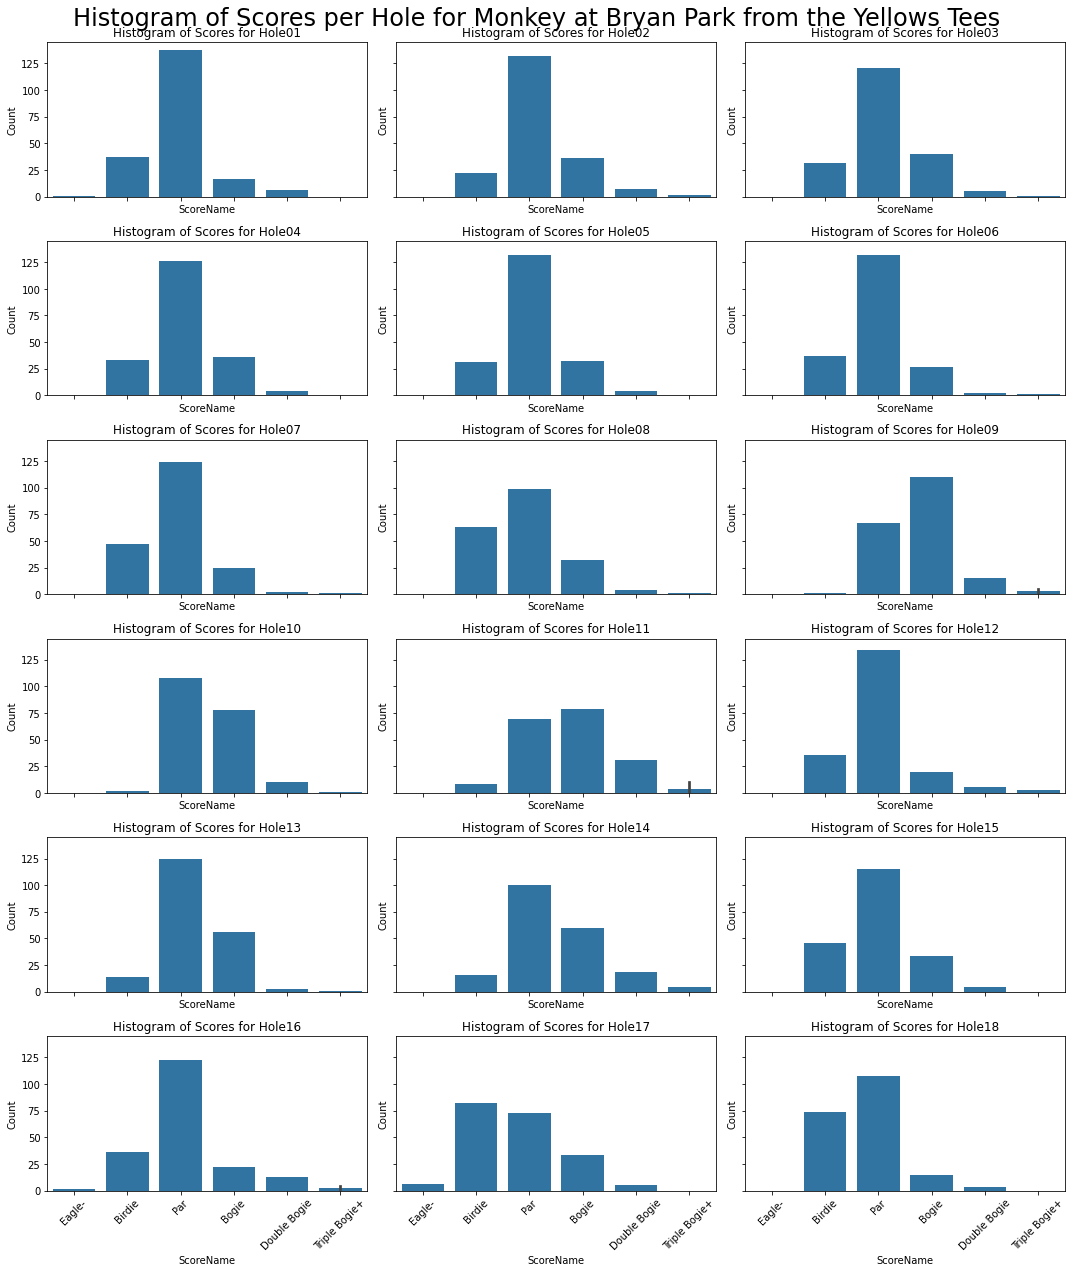

In [8]:
get_player_stats(
    df=df,
    player="Monkey",
    course=course,
    layout=layout,
    min_date=min_date,
    plot_dir="reports/img/",
)

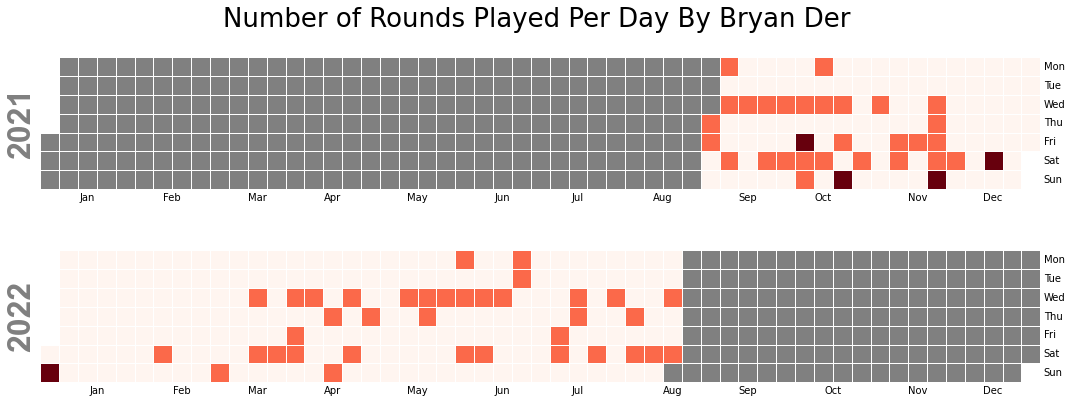

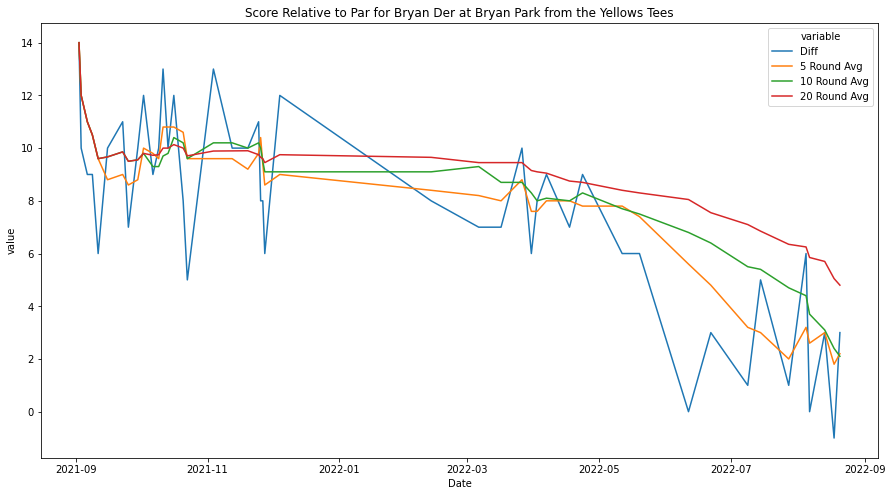

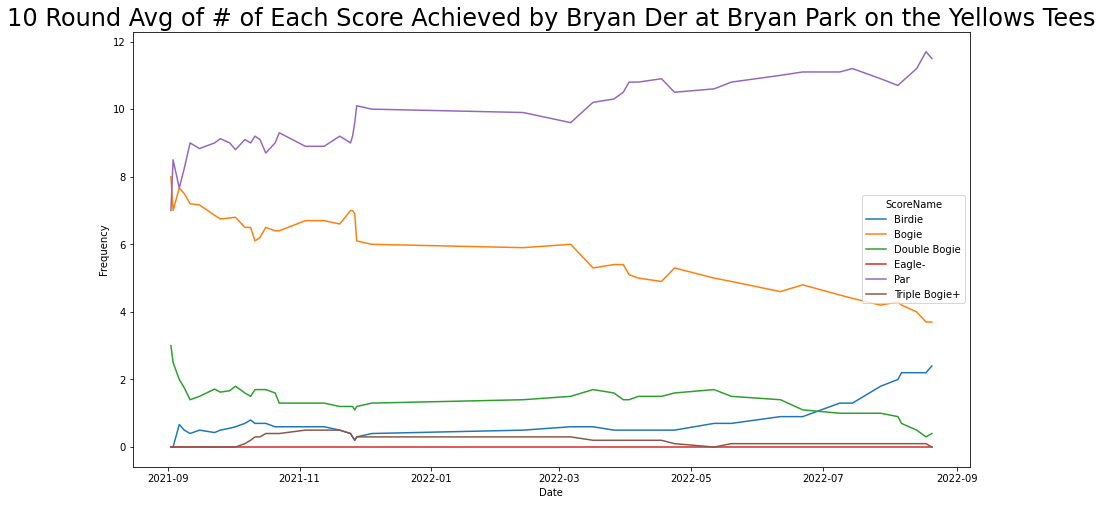

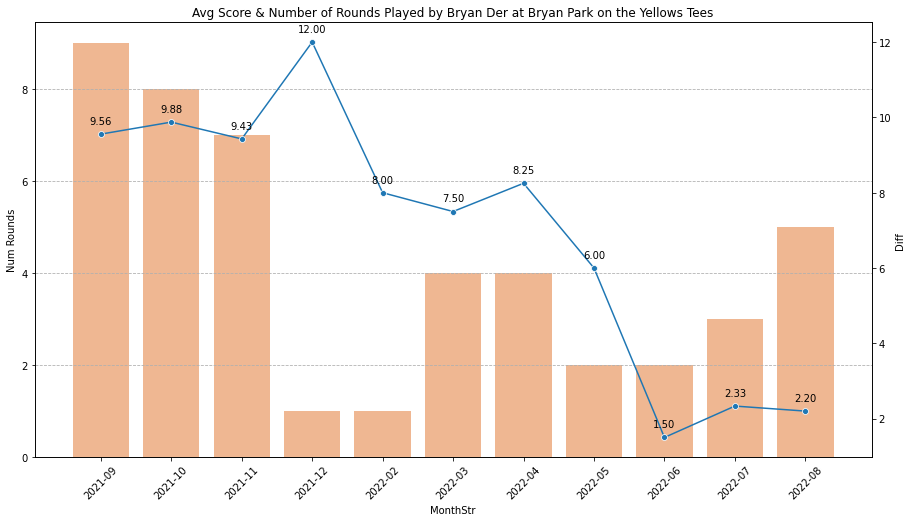

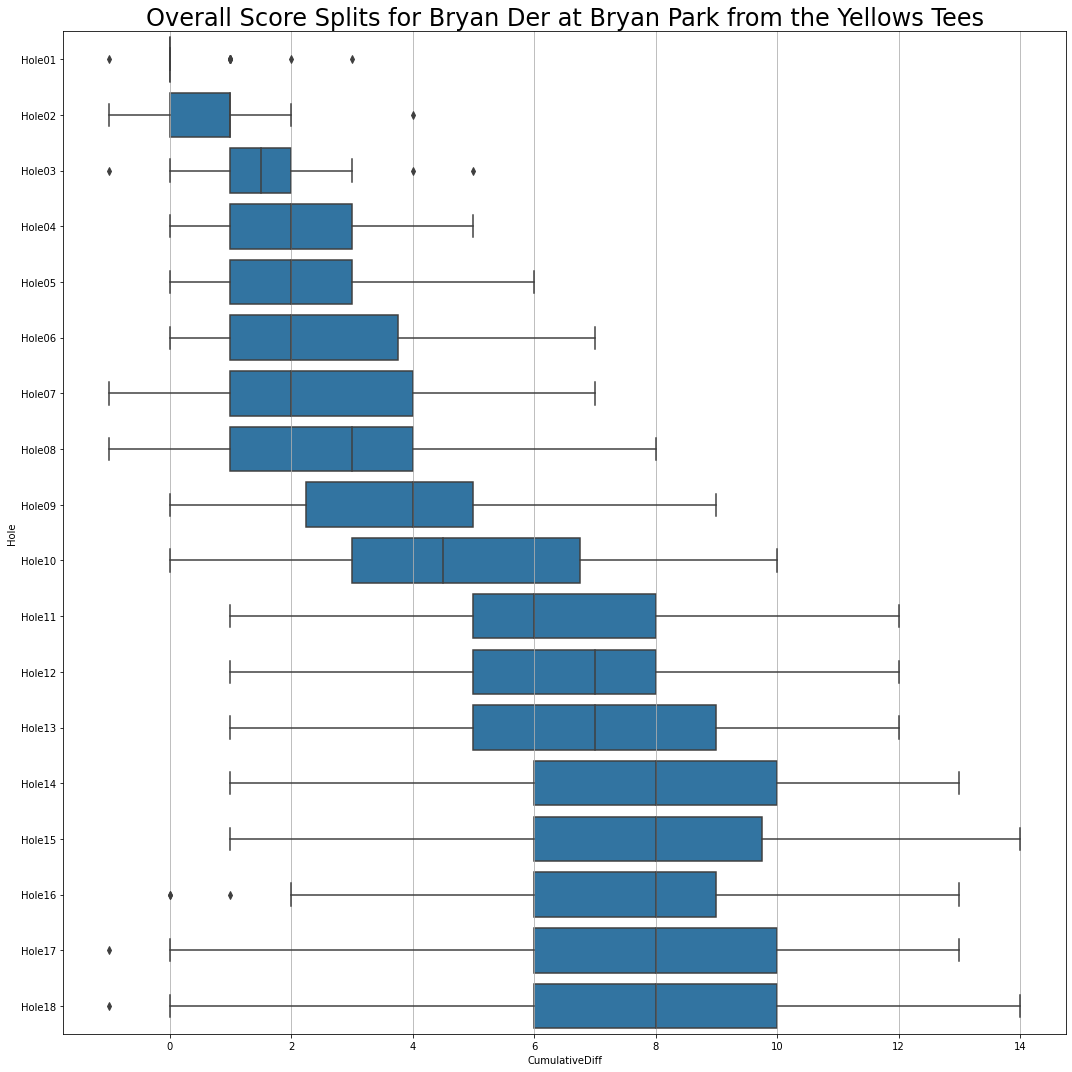

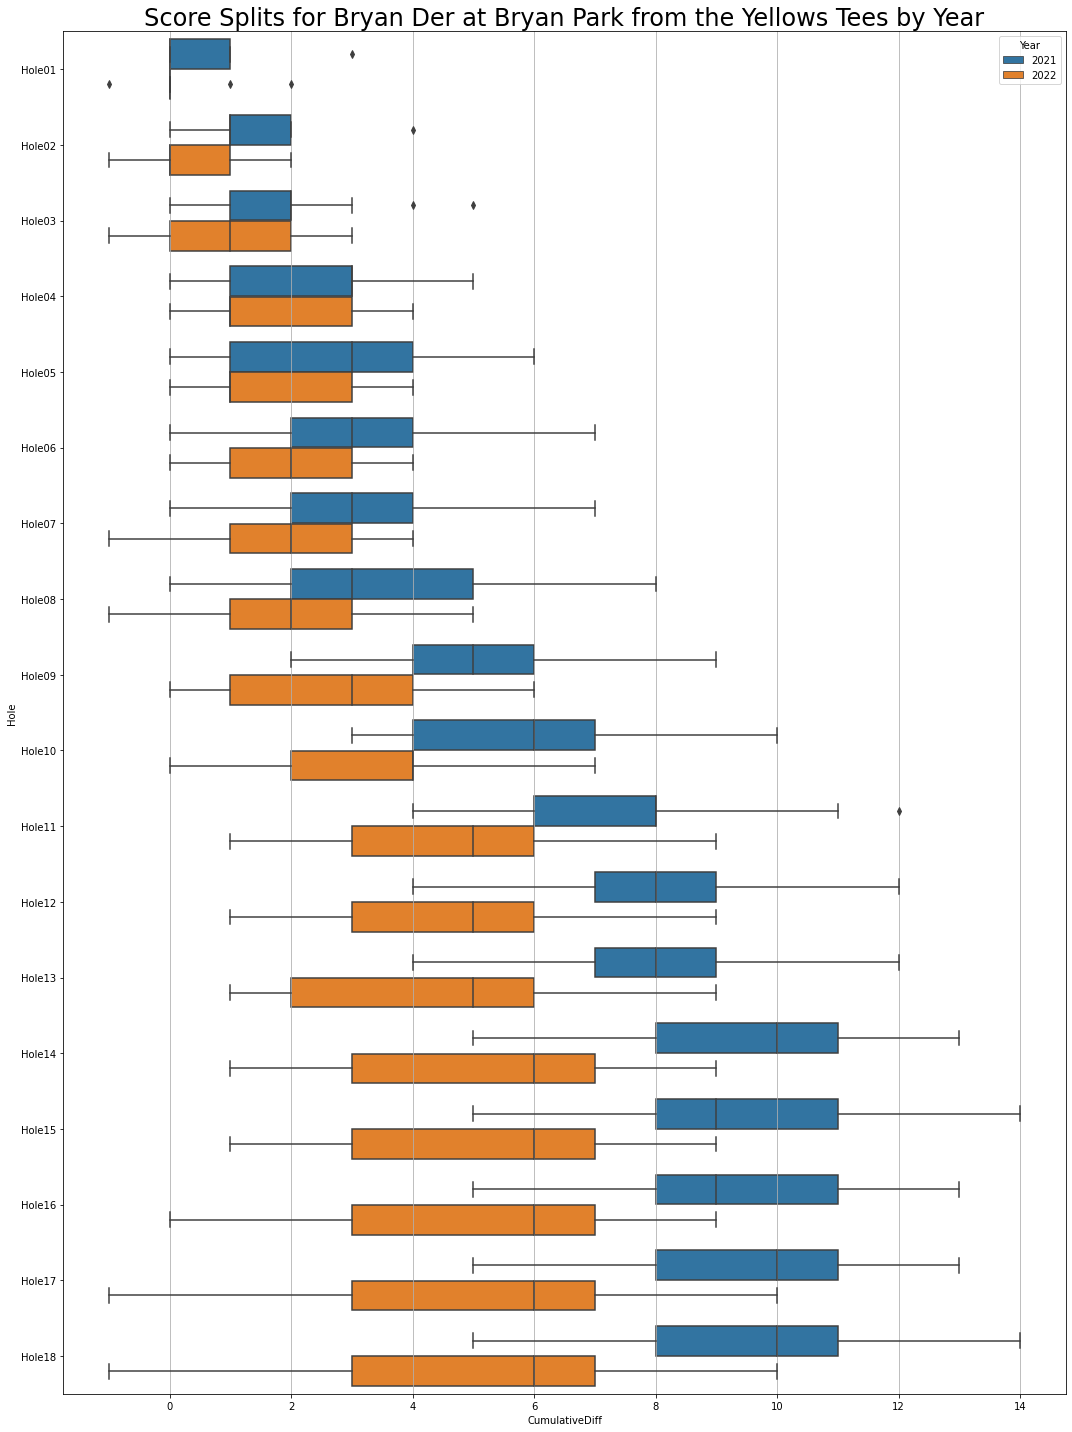

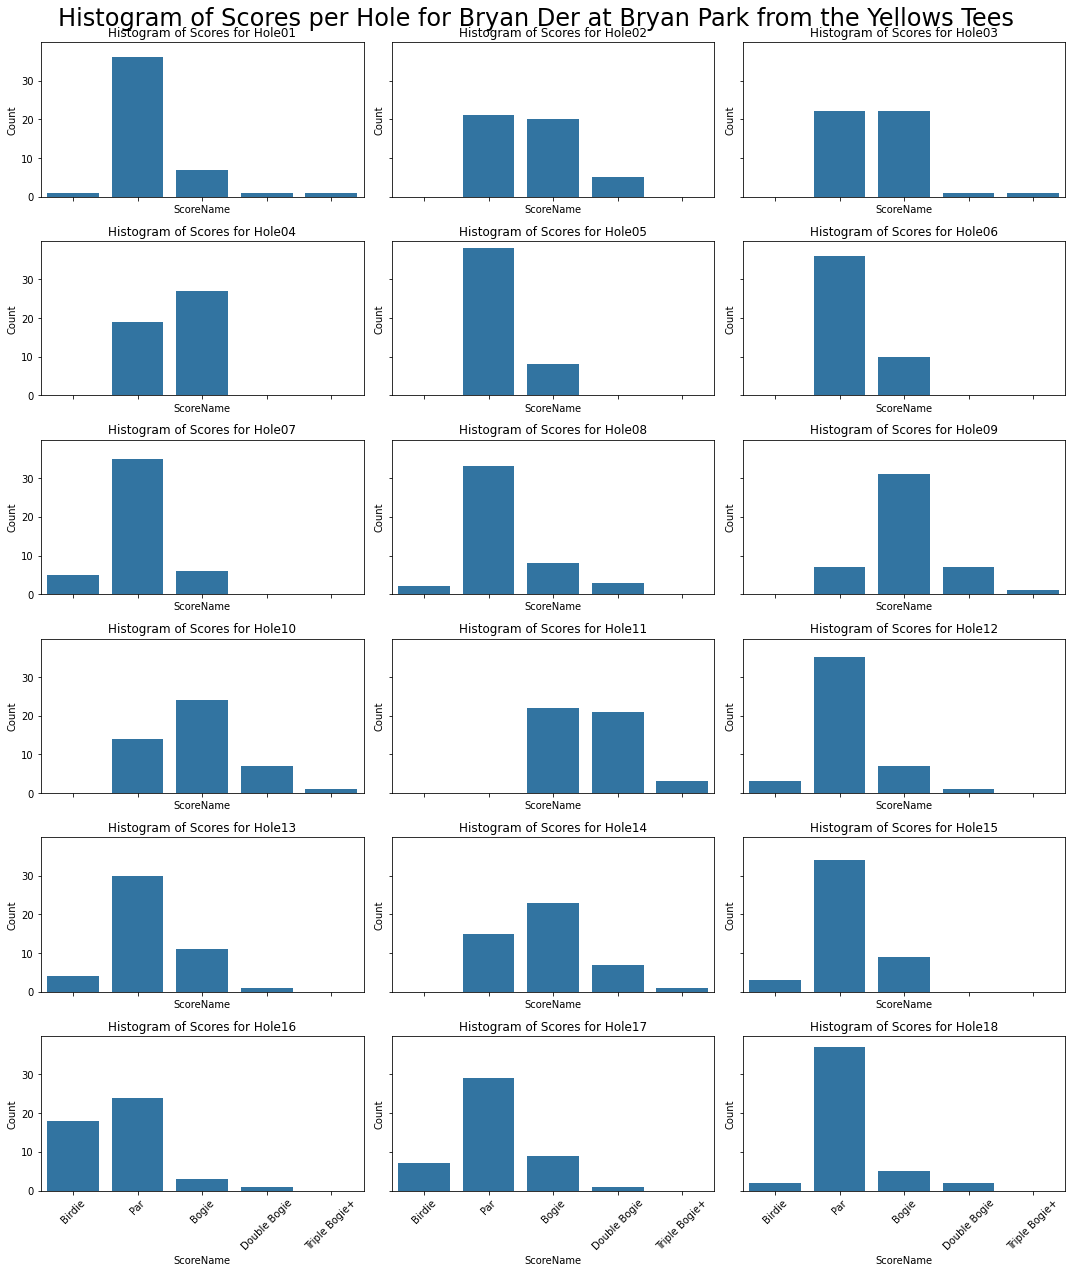

In [9]:
get_player_stats(
    df=df,
    player="Bryan Der",
    course=course,
    layout=layout,
    min_date=min_date
)

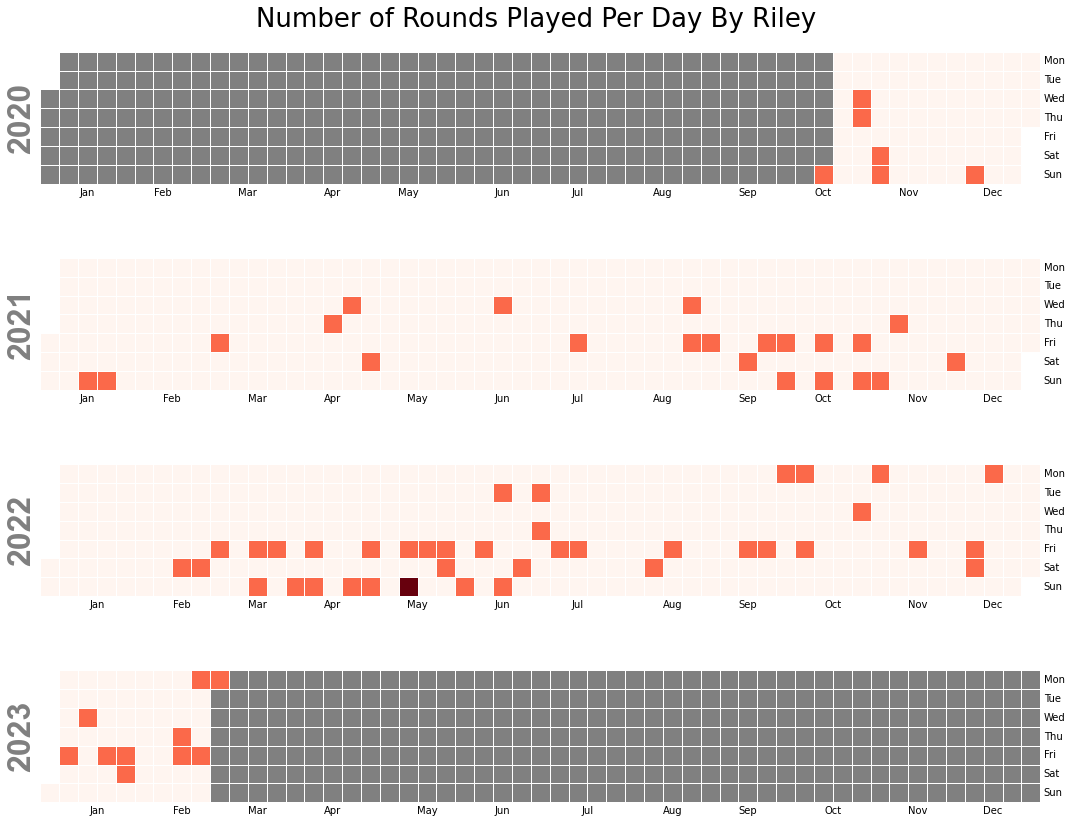

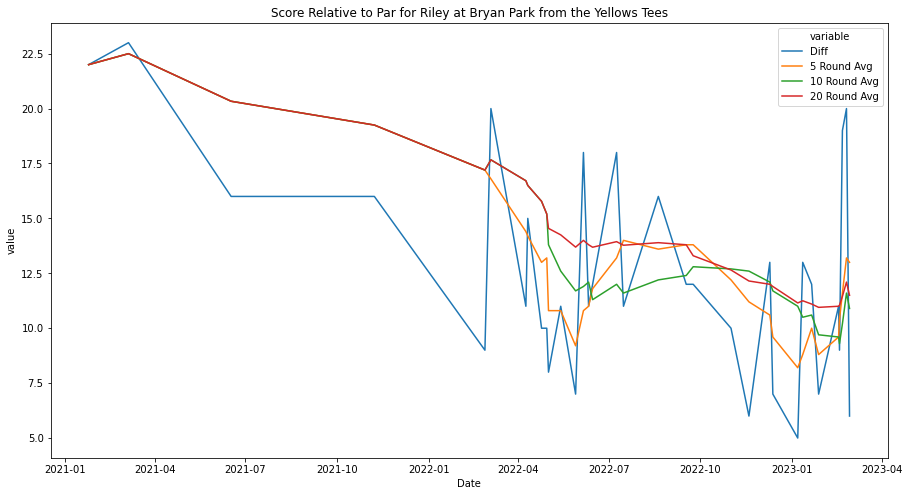

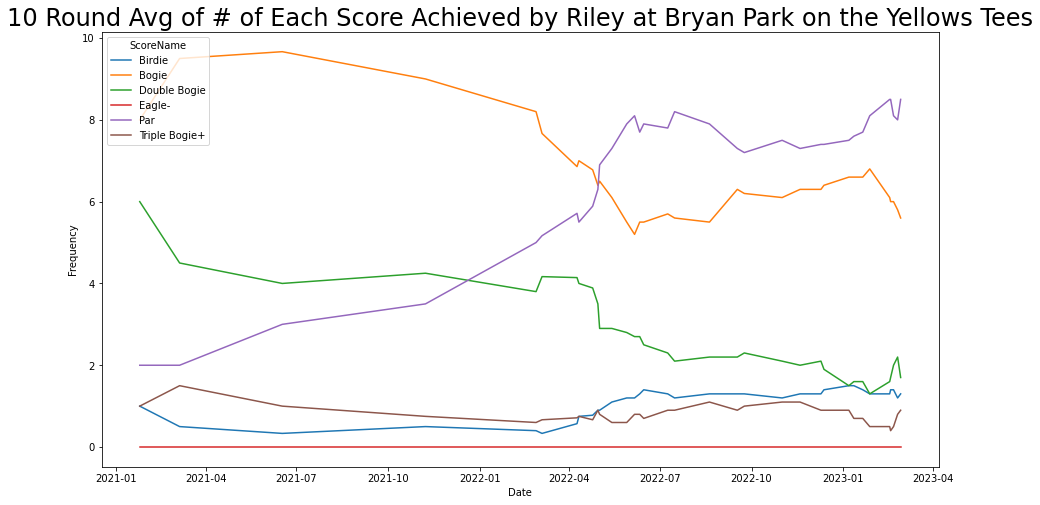

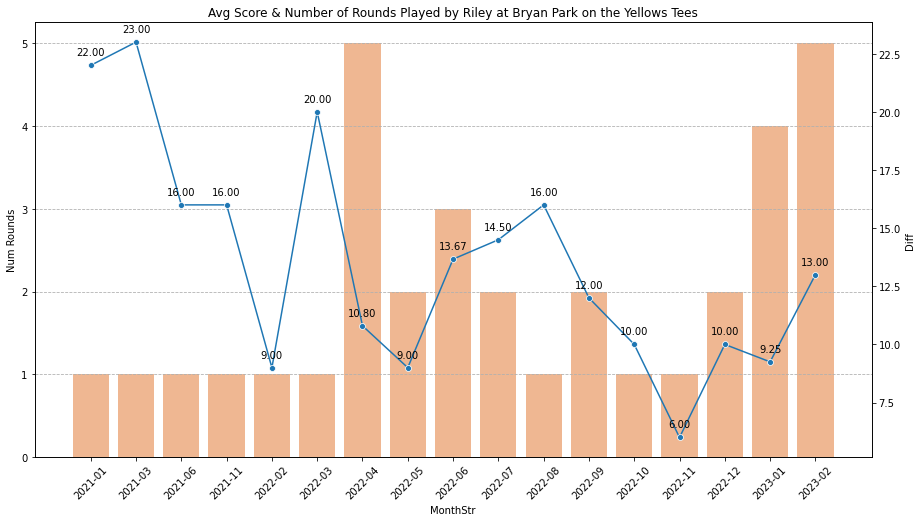

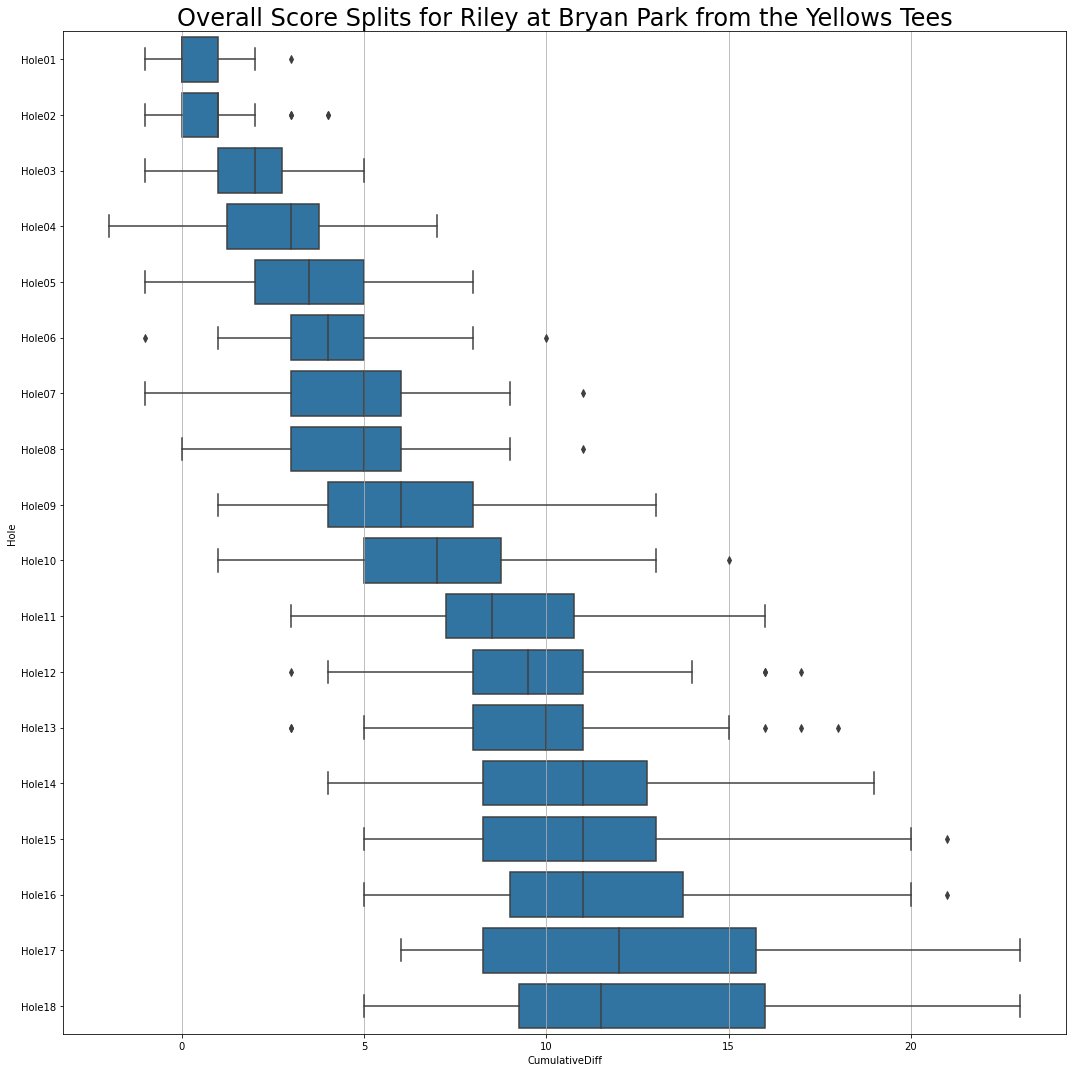

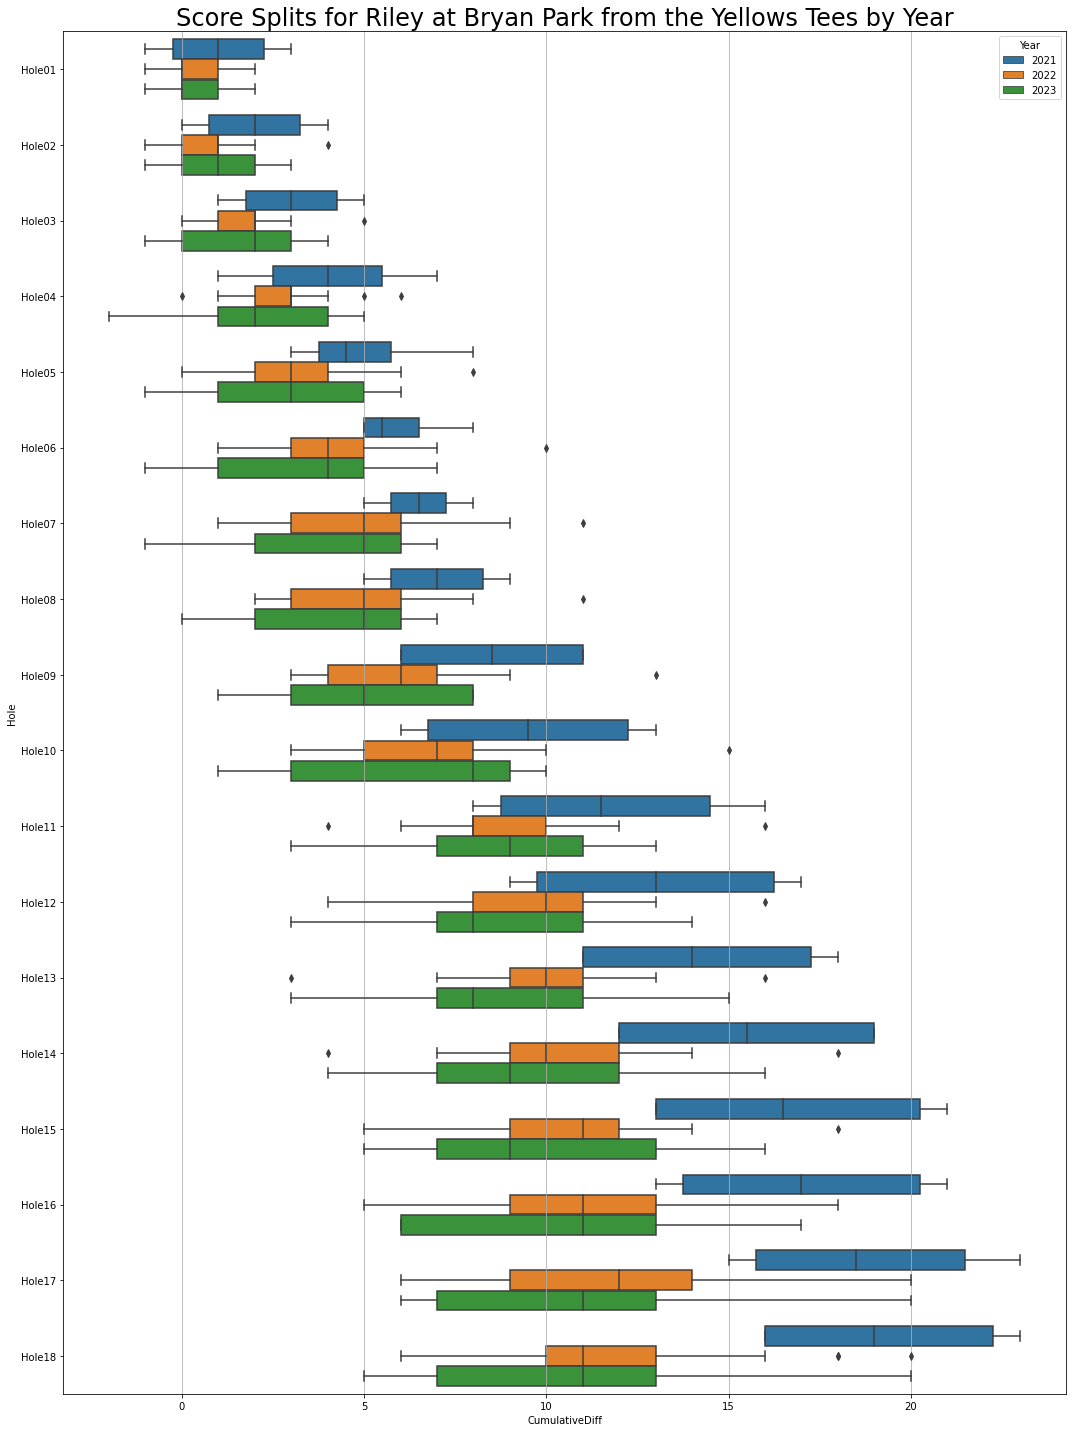

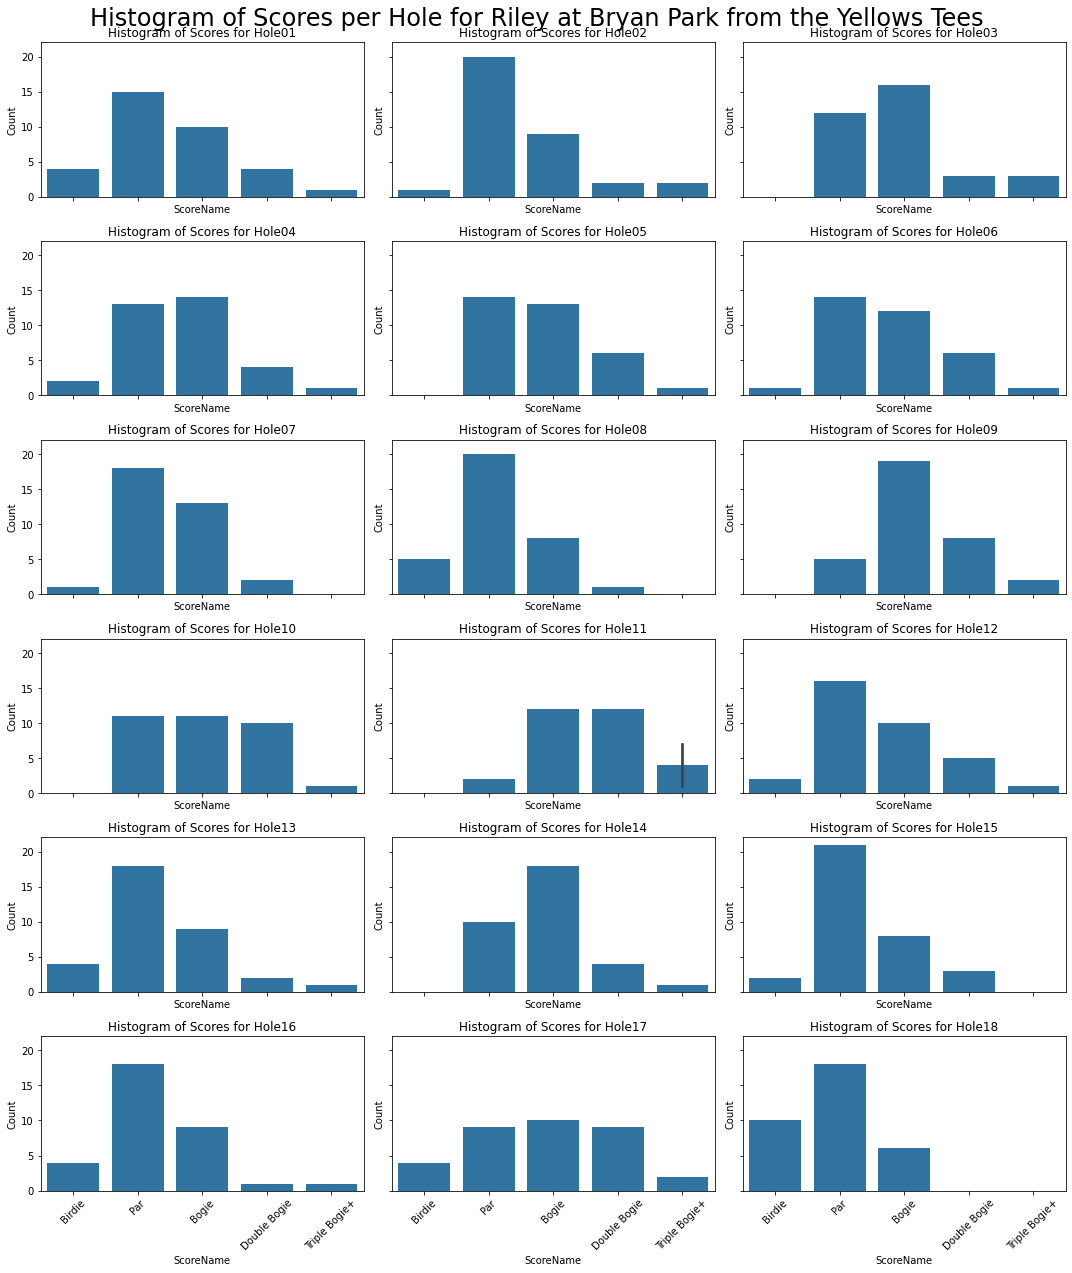

In [10]:
get_player_stats(
    df=df,
    player="Riley",
    course=course,
    layout=layout,
    min_date=min_date,
)